# Calculate saliency maps for e2e model

Trying to answer reviewer question about what features of the image are important for the e2e method.

In [ ]:
import os
import sys
module_path = os.path.abspath(os.path.join('/mnt/fs6/zwang71/BehaviorVideo_fengc/'))
if module_path not in sys.path:
    sys.path.append(module_path)
os.chdir('BehaviorVideo_fengc/')

import final_report
import torch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import argparse
import pickle
import glob
import json
import Frame2FrCPanel

## Example session

In [ ]:
configs = {
        'FF-save_log':False,
        'FF-gpus':'5',
        'FF-lr':5e-4,
        'FF-bs':1,
        'FF-step_report':1000,
        'FF-nbr':5,
        'FF-raw_data_name':'SC035_010820-589-25000-a2-rightMedulla',
        'FF-node':'12',
        'FF-num_workers':2,
        'FF-multi_time_offset':False,
        'FF-multi_time_offset_period':'response',
    }

os.environ["CUDA_VISIBLE_DEVICES"] = configs['FF-gpus']

configs['FF-train_name_add'] = '-'.join([
        '',
        'node{}'.format('12'),
        'lr{:.3e}'.format(configs['FF-lr']),
        'nbr{}'.format(configs['FF-nbr']),
        configs['FF-raw_data_name']
        ])+'testttt'
c_panel = Frame2FrCPanel.ComputePanel(configs)

['SC035_010820']
1236
init data
['side']
SC035_010820
--------------------
/mnt/fs2/yiliu021/MAP_data/MAP_final
--------------------
/mnt/fs2/yiliu021/MAP_data/MAP_final/map-export_SC035_20200108_105741_s34_p3.mat
length of labeldf 640
exist video 640
allowed trials 569
enough pre-sample 569
after stim filter 434
/data5/zwang71/MiceBehavior/data/SC/frames/side/SC035/20200108/SC-SC035-20200108-29/SC-SC035-20200108-29-side-02106.jpg is not intact
/data5/zwang71/MiceBehavior/data/SC/frames/side/SC035/20200108/SC-SC035-20200108-147/SC-SC035-20200108-147-side-01930.jpg is not intact
/data5/zwang71/MiceBehavior/data/SC/frames/side/SC035/20200108/SC-SC035-20200108-196/SC-SC035-20200108-196-side-01903.jpg is not intact
/data5/zwang71/MiceBehavior/data/SC/frames/side/SC035/20200108/SC-SC035-20200108-203/SC-SC035-20200108-203-side-01928.jpg is not intact
/data5/zwang71/MiceBehavior/data/SC/frames/side/SC035/20200108/SC-SC035-20200108-248/SC-SC035-20200108-248-side-02029.jpg is not intact
/data5/

In [3]:
save_dict=torch.load('log/Frame2Fr_log/SC035_010820-589-25000-a2-rightMedulla/62--node12-lr5.000e-04-nbr5-SC035_010820-589-25000-a2-rightMedullatest-2024-06-11/checkpoints/iter-20000-train[349.3]-val[408.1-0.535].pt')
c_panel.model.load_state_dict(save_dict)

<All keys matched successfully>

In [ ]:
c_panel.evaluation('test')

(397.8214126676952, 0.556975049495388, 0.4048903377927273)

In [4]:
c_panel.model._modules

OrderedDict([('cnn',
              Sequential(
                (0): ResNet(
                  (conv0): Sequential(
                    (0): Conv2d(1, 16, kernel_size=(1, 1), stride=(1, 1))
                    (1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
                    (2): ReLU()
                  )
                  (conv_seq): Sequential(
                    (conv0): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
                    (bn0): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
                    (relu0): ReLU()
                    (conv1): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
                    (bn1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
                    (relu1): ReLU()
                    (conv2): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
                    (bn2): BatchNorm2d(16

In [5]:
(frame, label, uid, _, fr) = c_panel.data_loader['test'].dataset[0]

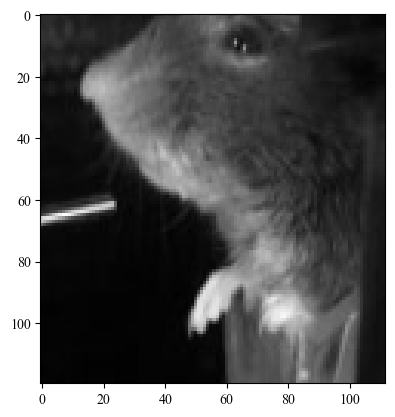

In [8]:
input_image = torch.from_numpy(frame[:1236]).view(1,1236,1,120,112)
plt.imshow(input_image[0,0,0,:,:].cpu().numpy(), cmap='gray')

In [9]:
torch_input_image = input_image.to(device=c_panel.configs['FF-device'], dtype=torch.float)
torch_input_image.requires_grad_()

tensor([[[[[0.1843, 0.1922, 0.1961,  ..., 0.0588, 0.0588, 0.0627],
           [0.1882, 0.1961, 0.1961,  ..., 0.0588, 0.0588, 0.0627],
           [0.1843, 0.1961, 0.2000,  ..., 0.0549, 0.0549, 0.0588],
           ...,
           [0.0392, 0.0431, 0.0471,  ..., 0.0980, 0.1020, 0.1059],
           [0.0431, 0.0471, 0.0471,  ..., 0.0980, 0.1020, 0.1059],
           [0.0471, 0.0471, 0.0471,  ..., 0.0980, 0.1059, 0.1098]]],


         [[[0.1882, 0.1882, 0.1961,  ..., 0.0588, 0.0627, 0.0667],
           [0.1922, 0.1922, 0.1961,  ..., 0.0588, 0.0627, 0.0667],
           [0.1882, 0.1961, 0.2039,  ..., 0.0588, 0.0627, 0.0627],
           ...,
           [0.0431, 0.0431, 0.0431,  ..., 0.0980, 0.1020, 0.1059],
           [0.0471, 0.0471, 0.0471,  ..., 0.1020, 0.1059, 0.1059],
           [0.0471, 0.0471, 0.0471,  ..., 0.1020, 0.1059, 0.1098]]],


         [[[0.1843, 0.1843, 0.1961,  ..., 0.0627, 0.0627, 0.0667],
           [0.1882, 0.1882, 0.2000,  ..., 0.0627, 0.0627, 0.0667],
           [0.1882, 0.

In [12]:
output = c_panel.model(torch_input_image)
output.shape

torch.Size([1, 1220, 87])

In [ ]:
output[0,1200,80].backward()
saliency_map = torch_input_image.grad.abs().sum(dim=1).squeeze()

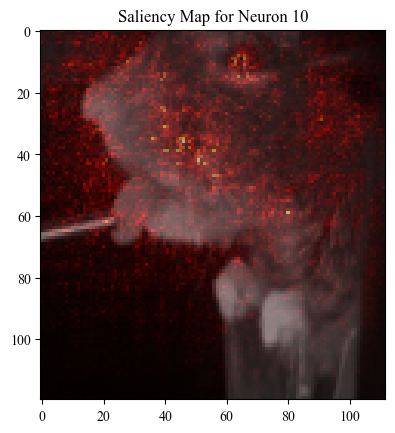

In [15]:
plt.title(f'Saliency Map for Neuron {10}')
plt.imshow(input_image[0,1200,0,:,:].cpu().numpy(), cmap='gray')
plt.imshow(saliency_map.cpu().numpy(), cmap='hot', alpha = 0.5)
plt.show()

In [47]:
neuron_ind = 13
torch_input_image = input_image.to(device=c_panel.configs['FF-device'], dtype=torch.float)
torch_input_image.requires_grad_()
output = c_panel.model(torch_input_image)
output.shape
output[0,:,neuron_ind].sum().backward()
saliency_map = torch_input_image.grad.abs().sum(dim=1).squeeze()

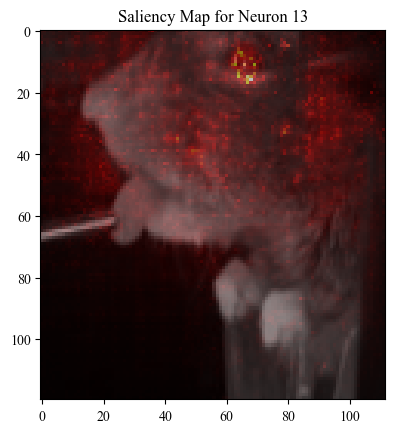

In [48]:
plt.title(f'Saliency Map for Neuron {neuron_ind}')
plt.imshow(input_image[0,1200,0,:,:].cpu().numpy(), cmap='gray')
plt.imshow(saliency_map.cpu().numpy(), cmap='hot', alpha = 0.5)
plt.show()

## Look at a different session

In [ ]:
with open('run_list2.pickle', 'rb') as f:
        run_list = pickle.load(f)

number = 20

print(run_list[number])

configs = {
        'FF-save_log':False,
        'FF-gpus':'5',
        'FF-lr':5e-4,
        'FF-bs':1,
        'FF-step_report':1000,
        'FF-nbr':5,
        'FF-raw_data_name':run_list[number],
        'FF-node':'12',
        'FF-num_workers':2,
        'FF-multi_time_offset':False,
        'FF-multi_time_offset_period':'response',
    }

os.environ["CUDA_VISIBLE_DEVICES"] = configs['FF-gpus']
c_panel = Frame2FrCPanel.ComputePanel(configs)

SC038_112119_s8-614-25000-a2-leftThalamus
['SC038_112119_s8']
1236
init data
['side']
SC038_112119_s8
--------------------
/mnt/fs2/yiliu021/MAP_data/MAP_final
--------------------
/mnt/fs2/yiliu021/MAP_data/MAP_final/map-export_SC038_20191121_113844_s8_p2.mat
length of labeldf 440
exist video 440
allowed trials 377
enough pre-sample 377
after stim filter 287
final 287
[-882, -881, -880, -879, -878, -877, -876, -875, -874, -873, -872, -871, -870, -869, -868, -867, -866, -865, -864, -863, -862, -861, -860, -859, -858, -857, -856, -855, -854, -853, -852, -851, -850, -849, -848, -847, -846, -845, -844, -843, -842, -841, -840, -839, -838, -837, -836, -835, -834, -833, -832, -831, -830, -829, -828, -827, -826, -825, -824, -823, -822, -821, -820, -819, -818, -817, -816, -815, -814, -813, -812, -811, -810, -809, -808, -807, -806, -805, -804, -803, -802, -801, -800, -799, -798, -797, -796, -795, -794, -793, -792, -791, -790, -789, -788, -787, -786, -785, -784, -783, -782, -781, -780, -779, -77

In [59]:
#ave_dict=torch.load('log/Frame2Fr_log/SC038_111919_s4-610-25000-a2-leftMidbrain/0--node12-lr5.000e-04-nbr5-SC038_111919_s4-610-25000-a2-leftMidbrain-ds-2024-11-13/checkpoints/iter-20000-train[221.9]-val[571.6--0.252].pt')
save_dict = torch.load('log/Frame2Fr_log/SC038_112119_s8-614-25000-a2-leftThalamus/0--node12-lr5.000e-04-nbr5-SC038_112119_s8-614-25000-a2-leftThalamus-ds-2024-11-14/checkpoints/iter-20000-train[132.6]-val[145.0-0.119].pt')
c_panel.model.load_state_dict(save_dict)

<All keys matched successfully>

In [60]:
(frame, label, uid, _, fr) = c_panel.data_loader['test'].dataset[0]
input_image = torch.from_numpy(frame[:1236]).view(1,1236,1,120,112)
torch_input_image = input_image.to(device=c_panel.configs['FF-device'], dtype=torch.float)
torch_input_image.requires_grad_()


tensor([[[[[0.4431, 0.3569, 0.2745,  ..., 0.1882, 0.1922, 0.1922],
           [0.4353, 0.3412, 0.2706,  ..., 0.1882, 0.1922, 0.1843],
           [0.3882, 0.3216, 0.2745,  ..., 0.1843, 0.1922, 0.1843],
           ...,
           [0.0510, 0.0510, 0.0510,  ..., 0.5765, 0.5843, 0.5961],
           [0.0510, 0.0510, 0.0510,  ..., 0.5725, 0.5882, 0.6000],
           [0.0510, 0.0510, 0.0510,  ..., 0.5647, 0.5765, 0.5922]]],


         [[[0.4392, 0.3529, 0.2706,  ..., 0.1922, 0.1882, 0.1961],
           [0.4392, 0.3451, 0.2745,  ..., 0.1843, 0.1804, 0.1961],
           [0.3882, 0.3176, 0.2745,  ..., 0.1804, 0.1882, 0.1922],
           ...,
           [0.0510, 0.0510, 0.0510,  ..., 0.5843, 0.5882, 0.5922],
           [0.0510, 0.0510, 0.0510,  ..., 0.5843, 0.5882, 0.5961],
           [0.0510, 0.0510, 0.0510,  ..., 0.5725, 0.5765, 0.5843]]],


         [[[0.4392, 0.3529, 0.2706,  ..., 0.1882, 0.1804, 0.1922],
           [0.4431, 0.3451, 0.2745,  ..., 0.1804, 0.1843, 0.1882],
           [0.3882, 0.

In [61]:
smaps = []
for neuron_ind in range(9):
    torch_input_image = input_image.to(device=c_panel.configs['FF-device'], dtype=torch.float)
    torch_input_image.requires_grad_()
    output = c_panel.model(torch_input_image)
    output.shape
    output[0,:,neuron_ind].sum().backward()
    saliency_map = torch_input_image.grad.abs().sum(dim=1).squeeze()
    smaps.append(saliency_map)

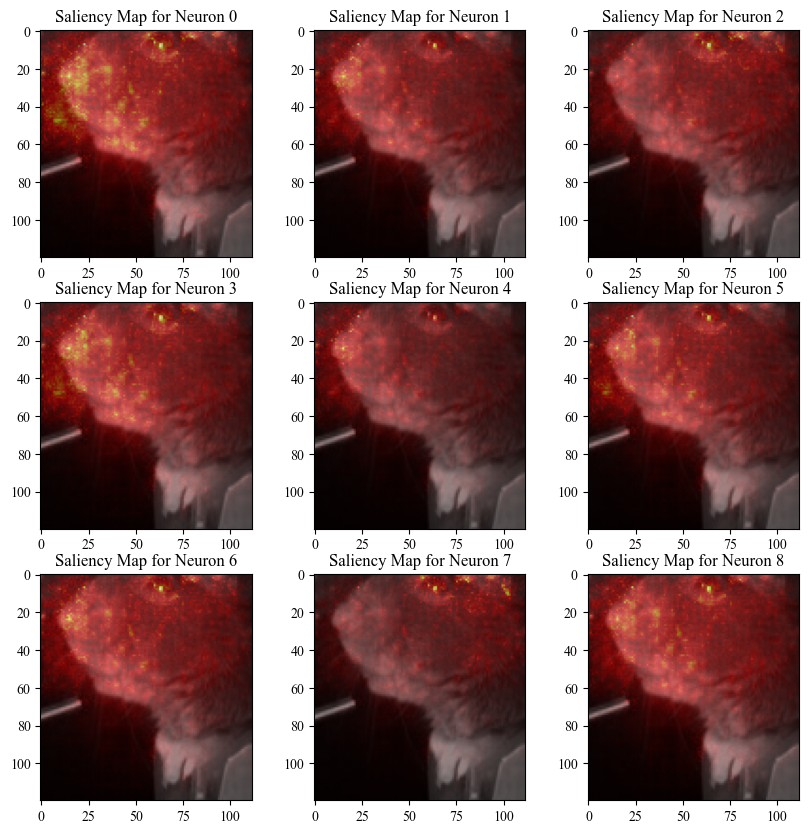

In [62]:
plt.subplots(3,3, figsize=(10,10)) 
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.title(f'Saliency Map for Neuron {i}')
    plt.imshow(input_image[0,1200,0,:,:].cpu().numpy(), cmap='gray')
    plt.imshow(smaps[i].cpu().numpy(), cmap='hot', alpha = 0.5)

plt.savefig('/mnt/fs6/zwang71/figs/' + run_list[number] + 'e2e_saliency_map.png', dpi=300, bbox_inches='tight')


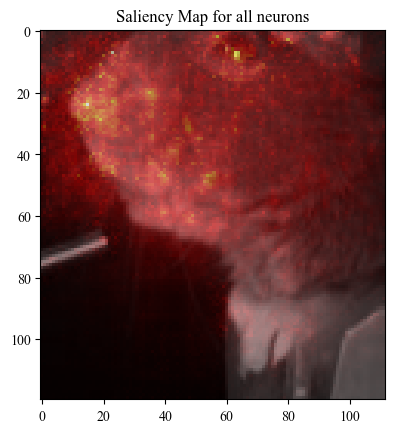

In [63]:
torch_input_image = input_image.to(device=c_panel.configs['FF-device'], dtype=torch.float)
torch_input_image.requires_grad_()
output = c_panel.model(torch_input_image)
output.shape
output[0,:,:].sum().backward()
saliency_map = torch_input_image.grad.abs().sum(dim=1).squeeze()

plt.title(f'Saliency Map for all neurons')
plt.imshow(input_image[0,1200,0,:,:].cpu().numpy(), cmap='gray')
plt.imshow(saliency_map.cpu().numpy(), cmap='hot', alpha = 0.5)
plt.show()

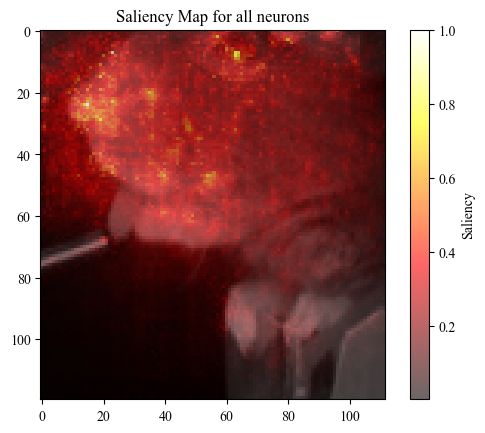

In [75]:
plt.title(f'Saliency Map for all neurons')
plt.imshow(input_image[0,1100,0,:,:].cpu().numpy(), cmap='gray')
im = plt.imshow(saliency_map.cpu().numpy() / np.max(saliency_map.cpu().numpy()), cmap='hot', alpha = 0.6)
plt.colorbar(im, label = 'Saliency')
plt.savefig('/mnt/fs6/zwang71/figs/' + run_list[number] + 'e2e_saliency_map_all_neurons.png', dpi=300, bbox_inches='tight')

## Top 10 neurons

In [76]:
neurons_of_interest = {
    'SC031_20191021_left_Medulla.pickle': 11,
    'SC067_20210413_left_Midbrain.pickle': 38,
    'SC030_20191005_right_Medulla.pickle': 14,
    'SC067_20210420_right_Midbrain.pickle': 55,
    'SC033_20191115_right_Midbrain.pickle': 14,
    'SC035_20200110_left_Medulla.pickle': 19,
    'SC050_20210302_left_Midbrain.pickle': 0,
    'SC067_20210418_left_Medulla.pickle': 0,
    'SC033_20191114_left_Medulla.pickle': 30,
    'SC067_20210413_right_Medulla.pickle': 18,
} #high e2e and low emebd & marker


In [7]:
with open('run_list.pickle', 'rb') as f:
        run_list = pickle.load(f)

In [85]:
run_list

['SC032_121919-556-25000-a3-rightMidbrain',
 'SC030_100519-542-25000-a2-rightALM',
 'SC053_022521-603-25000-a3-rightStriatum',
 'SC027_080419-529-25000-a2-rightStriatum',
 'SC064_050821-626-25000-a4-rightThalamus',
 'SC052_012621-599-25000-a3-rightThalamus',
 'SC048_010421-662-25000-a2-rightMidbrain',
 'SC061_032221-616-25000-a1-rightALM',
 'SC064_050621-624-25000-a2-rightMidbrain',
 'SC043_092420-649-25000-a3-leftMedulla',
 'SC061_032221-616-25000-a3-rightStriatum',
 'SC027_072919-524-25000-a3-rightMidbrain',
 'SC026_080819-523-25000-a1-leftALM',
 'SC026_080519-521-25000-a3-rightMidbrain',
 'SC050_022721-593-25000-a2-rightALM',
 'SC027_073019-525-25000-a2-rightALM',
 'SC065_051021-634-25000-a2-leftMidbrain',
 'SC035_010820-589-25000-a3-leftMidbrain',
 'SC060_032021-606-25000-a3-leftThalamus',
 'SC064_050421-623-25000-a3-rightStriatum',
 'SC060_032221-607-25000-a3-rightStriatum',
 'SC065_051021-634-25000-a3-leftStriatum',
 'SC066_041621-643-25000-a1-leftALM',
 'SC031_102119-543-25000-a

In [89]:
lookup_dict = {}

for k,v in neurons_of_interest.items():
    starting_string = k.split('_')[0] + '_' + k.split('_')[1][4:] + k.split('_')[1][2:4]
    ending_string = k.split('_')[2] + k.split('_')[3].split('.')[0]
    start_inds = [i for i, s in enumerate(run_list) if starting_string in s]
    end_inds = [i for i, s in enumerate(run_list) if ending_string in s]
    ind = list(set(start_inds) & set(end_inds))
    lookup_dict[ind[0]] = v
    print(ind)

[198]
[130]
[110]
[185]
[236]
[115]
[119]
[68]
[196]
[96]


In [90]:
lookup_dict

{198: 11,
 130: 38,
 110: 14,
 185: 55,
 236: 14,
 115: 19,
 119: 0,
 68: 0,
 196: 30,
 96: 18}

In [91]:
number = 198

print(run_list[number])

configs = {
        'FF-save_log':False,
        'FF-gpus':'5',
        'FF-lr':5e-4,
        'FF-bs':1,
        'FF-step_report':1000,
        'FF-nbr':5,
        'FF-raw_data_name':run_list[number],
        'FF-node':'12',
        'FF-num_workers':2,
        'FF-multi_time_offset':False,
        'FF-multi_time_offset_period':'response',
    }

os.environ["CUDA_VISIBLE_DEVICES"] = configs['FF-gpus']

#configs['FF-train_name_add'] = '-'.join([
#        '',
#        'node{}'.format('12'),
#        'lr{:.3e}'.format(configs['FF-lr']),
#        'nbr{}'.format(configs['FF-nbr']),
#        configs['FF-raw_data_name']
#        ])+'testttt'
c_panel = Frame2FrCPanel.ComputePanel(configs)

SC031_102119-543-25000-a3-leftMedulla
['SC031_102119']
1236
init data
['side']
SC031_102119
--------------------
/mnt/fs2/yiliu021/MAP_data/MAP_final
--------------------
/mnt/fs2/yiliu021/MAP_data/MAP_final/map-export_SC031_20191021_142044_s48_p1.mat
length of labeldf 440
exist video 440
allowed trials 335
enough pre-sample 335
after stim filter 243
final 243
[-882, -881, -880, -879, -878, -877, -876, -875, -874, -873, -872, -871, -870, -869, -868, -867, -866, -865, -864, -863, -862, -861, -860, -859, -858, -857, -856, -855, -854, -853, -852, -851, -850, -849, -848, -847, -846, -845, -844, -843, -842, -841, -840, -839, -838, -837, -836, -835, -834, -833, -832, -831, -830, -829, -828, -827, -826, -825, -824, -823, -822, -821, -820, -819, -818, -817, -816, -815, -814, -813, -812, -811, -810, -809, -808, -807, -806, -805, -804, -803, -802, -801, -800, -799, -798, -797, -796, -795, -794, -793, -792, -791, -790, -789, -788, -787, -786, -785, -784, -783, -782, -781, -780, -779, -778, -777, 

In [94]:
subfold = os.listdir('log/Frame2Fr_log/' + run_list[number])
checkpoints = os.listdir('log/Frame2Fr_log/SC031_102119-543-25000-a3-leftMedulla/' + subfold[0] + '/checkpoints')
final_checkpoint = [ch for ch in checkpoints if 'iter-20000' in ch][0]
save_dict = torch.load('log/Frame2Fr_log/SC031_102119-543-25000-a3-leftMedulla/' + subfold[0] + '/checkpoints/' + final_checkpoint)

In [95]:
c_panel.model.load_state_dict(save_dict)

<All keys matched successfully>

In [105]:
(frame, label, uid, _, fr) = c_panel.data_loader['test'].dataset[3]
input_image = torch.from_numpy(frame[:1236]).view(1,1236,1,120,112)
torch_input_image = input_image.to(device=c_panel.configs['FF-device'], dtype=torch.float)
torch_input_image.requires_grad_()


tensor([[[[[0.2157, 0.2000, 0.1843,  ..., 0.0745, 0.0745, 0.0745],
           [0.2196, 0.2039, 0.1843,  ..., 0.0745, 0.0706, 0.0706],
           [0.2353, 0.2196, 0.1922,  ..., 0.0745, 0.0745, 0.0745],
           ...,
           [0.0510, 0.0510, 0.0510,  ..., 0.2941, 0.2078, 0.2000],
           [0.0510, 0.0510, 0.0510,  ..., 0.2941, 0.2000, 0.1922],
           [0.0510, 0.0510, 0.0510,  ..., 0.2941, 0.1961, 0.1882]]],


         [[[0.2157, 0.2000, 0.1843,  ..., 0.0745, 0.0745, 0.0745],
           [0.2196, 0.2039, 0.1843,  ..., 0.0745, 0.0706, 0.0706],
           [0.2353, 0.2157, 0.1882,  ..., 0.0745, 0.0745, 0.0745],
           ...,
           [0.0510, 0.0510, 0.0510,  ..., 0.2863, 0.2118, 0.2000],
           [0.0510, 0.0510, 0.0510,  ..., 0.2824, 0.2000, 0.1922],
           [0.0510, 0.0510, 0.0510,  ..., 0.2784, 0.1961, 0.1882]]],


         [[[0.2157, 0.2078, 0.1843,  ..., 0.0745, 0.0745, 0.0745],
           [0.2118, 0.2039, 0.1804,  ..., 0.0745, 0.0745, 0.0745],
           [0.2314, 0.

In [106]:
neuron_ind = 11
torch_input_image = input_image.to(device=c_panel.configs['FF-device'], dtype=torch.float)
torch_input_image.requires_grad_()
output = c_panel.model(torch_input_image)
output.shape
output[0,:,neuron_ind].sum().backward()
saliency_map = torch_input_image.grad.abs().sum(dim=1).squeeze()


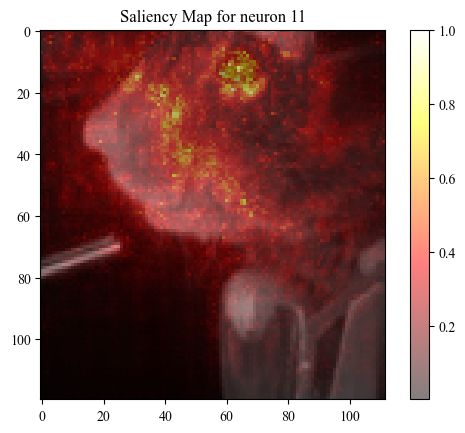

In [107]:
plt.title(f'Saliency Map for neuron {neuron_ind}')
plt.imshow(input_image[0,1200,0,:,:].cpu().numpy(), cmap='gray')
plt.imshow(saliency_map.cpu().numpy() / np.max(saliency_map.cpu().numpy()), cmap='hot', alpha = 0.5)
plt.colorbar()
plt.savefig('/mnt/fs6/zwang71/figs/' + run_list[number] + 'e2e_saliency_map_single_neuron.png', dpi=300, bbox_inches='tight')

In [108]:
torch_input_image = input_image.to(device=c_panel.configs['FF-device'], dtype=torch.float)
torch_input_image.requires_grad_()
output = c_panel.model(torch_input_image)
output.shape
output[0,:,:].sum().backward()
saliency_map = torch_input_image.grad.abs().sum(dim=1).squeeze()


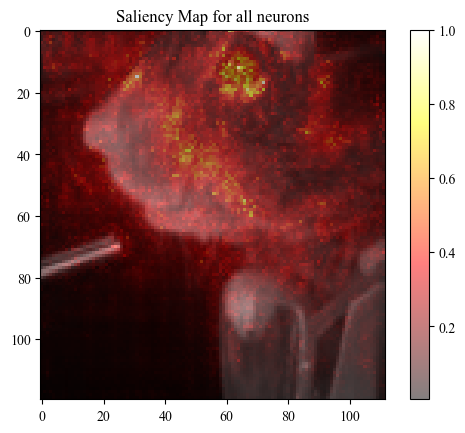

In [110]:
plt.title(f'Saliency Map for all neurons')
plt.imshow(input_image[0,1200,0,:,:].cpu().numpy(), cmap='gray')
plt.imshow(saliency_map.cpu().numpy() / np.max(saliency_map.cpu().numpy()), cmap='hot', alpha = 0.5)
plt.colorbar()
plt.savefig('/mnt/fs6/zwang71/figs/' + run_list[number] + 'e2e_saliency_map_all_neurons.png', dpi=300, bbox_inches='tight')

In [ ]:
smaps = []
neuron_ind = 11
for (frame, label, uid, _, fr) in c_panel.data_loader['test'].dataset:
    input_image = torch.from_numpy(frame[:1236]).view(1,1236,1,120,112)
    torch_input_image = input_image.to(device=c_panel.configs['FF-device'], dtype=torch.float)
    torch_input_image.requires_grad_()
    output = c_panel.model(torch_input_image)
    output[0,:,neuron_ind].sum().backward()
    saliency_map = torch_input_image.grad.abs().sum(dim=1).squeeze()
    smaps.append(saliency_map)

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.nd

In [118]:
smap_array = np.array([s.cpu().numpy() / np.max(s.cpu().numpy()) for s in smaps])

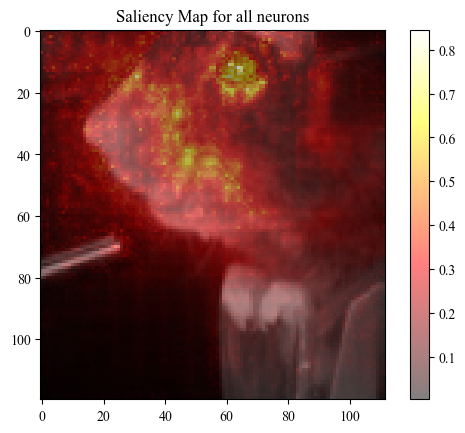

In [119]:
plt.title(f'Saliency Map for all neurons')
plt.imshow(input_image[0,1200,0,:,:].cpu().numpy(), cmap='gray')
plt.imshow(smap_array.mean(axis = 0), cmap='hot', alpha = 0.5)
plt.colorbar()
#plt.savefig('/mnt/fs6/zwang71/figs/' + run_list[number] + 'e2e_saliency_map.png', dpi=300, bbox_inches='tight')

In [121]:
single_neuron_saliency_maps = []
session_saliency_maps = []
example_background_images = []

for run_number, neuron_number in lookup_dict.items():
    
    configs = {
            'FF-save_log':False,
            'FF-gpus':'5',
            'FF-lr':5e-4,
            'FF-bs':1,
            'FF-step_report':1000,
            'FF-nbr':5,
            'FF-raw_data_name':run_list[run_number],
            'FF-node':'12',
            'FF-num_workers':2,
            'FF-multi_time_offset':False,
            'FF-multi_time_offset_period':'response',
        }

    os.environ["CUDA_VISIBLE_DEVICES"] = configs['FF-gpus']
    c_panel = Frame2FrCPanel.ComputePanel(configs)

    subfold = os.listdir('log/Frame2Fr_log/' + run_list[run_number])
    checkpoints = os.listdir('log/Frame2Fr_log/'+ run_list[run_number] +'/' + subfold[0] + '/checkpoints')
    final_checkpoint = [ch for ch in checkpoints if 'iter-20000' in ch][0]
    save_dict = torch.load('log/Frame2Fr_log/'+ run_list[run_number] + '/'+subfold[0] + '/checkpoints/' + final_checkpoint)

    c_panel.model.load_state_dict(save_dict)

    smaps = []

    for (frame, label, uid, _, fr) in c_panel.data_loader['test'].dataset:
        input_image = torch.from_numpy(frame[:1236]).view(1,1236,1,120,112)
        torch_input_image = input_image.to(device=c_panel.configs['FF-device'], dtype=torch.float)
        torch_input_image.requires_grad_()
        output = c_panel.model(torch_input_image)
        output[0,:,neuron_number].sum().backward()
        saliency_map = torch_input_image.grad.abs().sum(dim=1).squeeze()
        smaps.append(saliency_map)

    smap_array = np.array([s.cpu().numpy() / np.max(s.cpu().numpy()) for s in smaps])

    single_neuron_saliency_maps.append(smap_array.mean(axis = 0))

    smaps = []

    for (frame, label, uid, _, fr) in c_panel.data_loader['test'].dataset:
        input_image = torch.from_numpy(frame[:1236]).view(1,1236,1,120,112)
        torch_input_image = input_image.to(device=c_panel.configs['FF-device'], dtype=torch.float)
        torch_input_image.requires_grad_()
        output = c_panel.model(torch_input_image)
        output[0,:,:].sum().backward()
        saliency_map = torch_input_image.grad.abs().sum(dim=1).squeeze()
        smaps.append(saliency_map)

    smap_array = np.array([s.cpu().numpy() / np.max(s.cpu().numpy()) for s in smaps])

    session_saliency_maps.append(smap_array.mean(axis = 0))

    example_background_images.append(input_image[0,1200,0,:,:].cpu().numpy())





['SC031_102119']
1236
init data
['side']
SC031_102119
--------------------
/mnt/fs2/yiliu021/MAP_data/MAP_final
--------------------
/mnt/fs2/yiliu021/MAP_data/MAP_final/map-export_SC031_20191021_142044_s48_p1.mat
length of labeldf 440
exist video 440
allowed trials 335
enough pre-sample 335
after stim filter 243
final 243
[-882, -881, -880, -879, -878, -877, -876, -875, -874, -873, -872, -871, -870, -869, -868, -867, -866, -865, -864, -863, -862, -861, -860, -859, -858, -857, -856, -855, -854, -853, -852, -851, -850, -849, -848, -847, -846, -845, -844, -843, -842, -841, -840, -839, -838, -837, -836, -835, -834, -833, -832, -831, -830, -829, -828, -827, -826, -825, -824, -823, -822, -821, -820, -819, -818, -817, -816, -815, -814, -813, -812, -811, -810, -809, -808, -807, -806, -805, -804, -803, -802, -801, -800, -799, -798, -797, -796, -795, -794, -793, -792, -791, -790, -789, -788, -787, -786, -785, -784, -783, -782, -781, -780, -779, -778, -777, -776, -775, -774, -773, -772, -771, -7

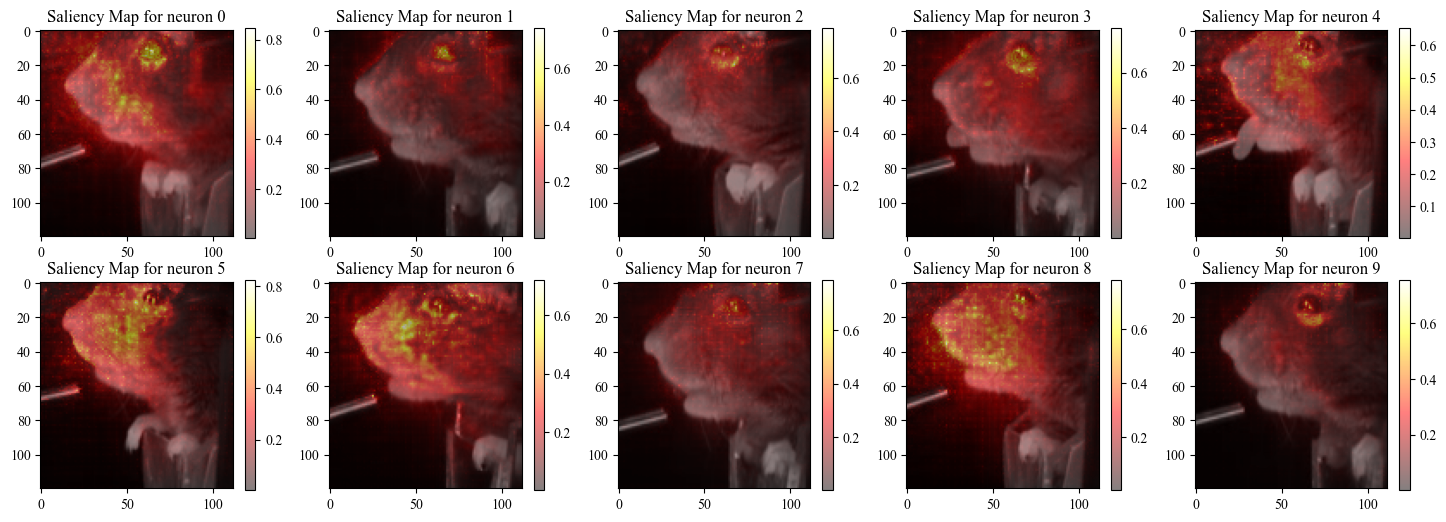

In [125]:
plt.subplots(2,5, figsize=(18,6))

for i in range(10):
    plt.subplot(2,5,i+1)
    plt.title(f'Saliency Map for neuron {i}')
    plt.imshow(example_background_images[i], cmap='gray')
    plt.imshow(single_neuron_saliency_maps[i], cmap='hot', alpha = 0.5)
    plt.colorbar()

plt.savefig('/mnt/fs6/zwang71/figs/' + 'e2e_saliency_map_single_neurons_goode2e_bad_other.png', dpi=300, bbox_inches='tight')

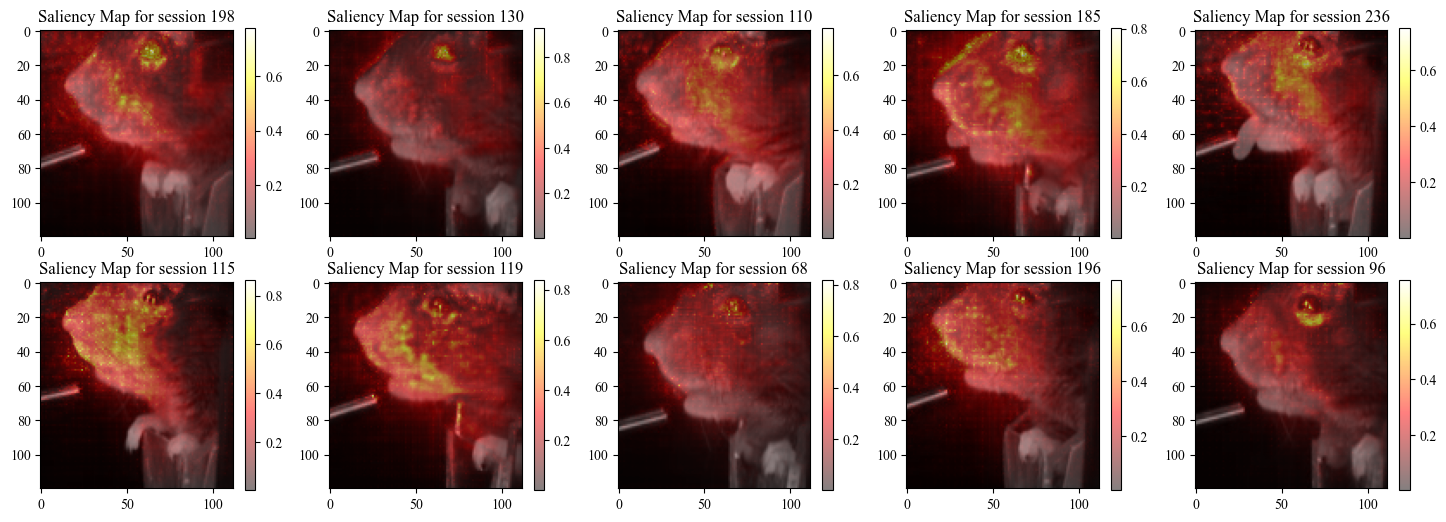

In [126]:
plt.subplots(2,5, figsize=(18,6))

for i in range(10):
    plt.subplot(2,5,i+1)
    plt.title(f'Saliency Map for session {list(lookup_dict.keys())[i]}')
    plt.imshow(example_background_images[i], cmap='gray')
    plt.imshow(session_saliency_maps[i], cmap='hot', alpha = 0.5)
    plt.colorbar()

plt.savefig('/mnt/fs6/zwang71/figs/' + 'e2e_saliency_map_session_goode2e_bad_other.png', dpi=300, bbox_inches='tight')

In [127]:
save_saliency_dict = {
    'single_neuron_saliency_maps': single_neuron_saliency_maps,
    'session_saliency_maps': session_saliency_maps,
    'example_background_images': example_background_images
}

pickle.dump(save_saliency_dict, open('/mnt/fs6/zwang71/figs/' + 'e2e_saliency_map_session_goode2e_bad_other.pickle', 'wb'))

## Look at top 10 and worst 10 files based on average response r2

In [ ]:
top10files = ['SC030_20191005_right_Medulla.pickle',
 'SC067_20210419_left_Medulla.pickle',
 'SC067_20210420_left_Medulla.pickle',
 'SC067_20210414_right_Medulla.pickle',
 'SC030_20191004_left_Medulla.pickle',
 'SC031_20191021_right_Medulla.pickle',
 'SC032_20191219_left_Medulla.pickle',
 'SC032_20191218_right_Medulla.pickle',
 'SC031_20191021_left_Medulla.pickle',
 'SC067_20210418_left_Medulla.pickle']

worst10files = ['SC045_20201214_right_Striatum.pickle',
 'SC050_20210301_left_Thalamus.pickle',
 'SC053_20210225_right_Midbrain.pickle',
 'SC045_20201214_left_Striatum.pickle',
 'SC065_20210509_right_Striatum.pickle',
 'SC065_20210510_left_Thalamus.pickle',
 'SC048_20201231_left_Midbrain.pickle',
 'SC048_20210101_left_Thalamus.pickle',
 'SC053_20210221_left_Midbrain.pickle',
 'SC065_20210510_left_Midbrain.pickle']

In [ ]:
top10_inds = []
worst10_inds = []

for k in top10files:
    starting_string = k.split('_')[0] + '_' + k.split('_')[1][4:] + k.split('_')[1][2:4]
    ending_string = k.split('_')[2] + k.split('_')[3].split('.')[0]
    start_inds = [i for i, s in enumerate(run_list) if starting_string in s]
    end_inds = [i for i, s in enumerate(run_list) if ending_string in s]
    ind = list(set(start_inds) & set(end_inds))
    top10_inds.append(ind[0])

for k in worst10files:
    starting_string = k.split('_')[0] + '_' + k.split('_')[1][4:] + k.split('_')[1][2:4]
    ending_string = k.split('_')[2] + k.split('_')[3].split('.')[0]
    start_inds = [i for i, s in enumerate(run_list) if starting_string in s]
    end_inds = [i for i, s in enumerate(run_list) if ending_string in s]
    ind = list(set(start_inds) & set(end_inds))
    worst10_inds.append(ind[0])

top10_inds, worst10_inds

In [13]:
print(top10_inds, worst10_inds)

best_session_saliency_maps = []
best_example_background_images = []

for run_number in top10_inds:
    
    configs = {
            'FF-save_log':False,
            'FF-gpus':'5',
            'FF-lr':5e-4,
            'FF-bs':1,
            'FF-step_report':1000,
            'FF-nbr':5,
            'FF-raw_data_name':run_list[run_number],
            'FF-node':'12',
            'FF-num_workers':2,
            'FF-multi_time_offset':False,
            'FF-multi_time_offset_period':'response',
        }

    os.environ["CUDA_VISIBLE_DEVICES"] = configs['FF-gpus']
    c_panel = Frame2FrCPanel.ComputePanel(configs)

    subfold = os.listdir('log/Frame2Fr_log/' + run_list[run_number])
    checkpoints = os.listdir('log/Frame2Fr_log/'+ run_list[run_number] +'/' + subfold[0] + '/checkpoints')
    final_checkpoint = [ch for ch in checkpoints if 'iter-20000' in ch][0]
    save_dict = torch.load('log/Frame2Fr_log/'+ run_list[run_number] + '/'+subfold[0] + '/checkpoints/' + final_checkpoint)

    c_panel.model.load_state_dict(save_dict)

    smaps = []

    for (frame, label, uid, _, fr) in c_panel.data_loader['test'].dataset:
        input_image = torch.from_numpy(frame[:1236]).view(1,1236,1,120,112)
        torch_input_image = input_image.to(device=c_panel.configs['FF-device'], dtype=torch.float)
        torch_input_image.requires_grad_()
        output = c_panel.model(torch_input_image)
        output[0,:,:].sum().backward()
        saliency_map = torch_input_image.grad.abs().sum(dim=1).squeeze()
        smaps.append(saliency_map)

    smap_array = np.array([s.cpu().numpy() / np.max(s.cpu().numpy()) for s in smaps])

    best_session_saliency_maps.append(smap_array.mean(axis = 0))

    best_example_background_images.append(input_image[0,1200,0,:,:].cpu().numpy())

[110, 247, 127, 255, 245, 23, 129, 186, 198, 68] [207, 65, 260, 274, 34, 253, 171, 109, 223, 16]
['SC030_100519']
1236
init data
['side']
SC030_100519
--------------------
/mnt/fs2/yiliu021/MAP_data/MAP_final
--------------------
/mnt/fs2/yiliu021/MAP_data/MAP_final/map-export_SC030_20191005_142316_s35_p4.mat
length of labeldf 700
exist video 700
allowed trials 550
enough pre-sample 550
after stim filter 423
/data5/zwang71/MiceBehavior/data/SC/frames/side/SC030/20191005/SC-SC030-20191005-118/SC-SC030-20191005-118-side-01843.jpg is over-intact
/data5/zwang71/MiceBehavior/data/SC/frames/side/SC030/20191005/SC-SC030-20191005-680/SC-SC030-20191005-680-side-01919.jpg is over-intact
final 421
[-882, -881, -880, -879, -878, -877, -876, -875, -874, -873, -872, -871, -870, -869, -868, -867, -866, -865, -864, -863, -862, -861, -860, -859, -858, -857, -856, -855, -854, -853, -852, -851, -850, -849, -848, -847, -846, -845, -844, -843, -842, -841, -840, -839, -838, -837, -836, -835, -834, -833, -83

In [16]:
worst_session_saliency_maps = []
worst_example_background_images = []

for run_number in worst10_inds:
    configs = {
            'FF-save_log':False,
            'FF-gpus':'5',
            'FF-lr':5e-4,
            'FF-bs':1,
            'FF-step_report':1000,
            'FF-nbr':5,
            'FF-raw_data_name':run_list[run_number],
            'FF-node':'12',
            'FF-num_workers':2,
            'FF-multi_time_offset':False,
            'FF-multi_time_offset_period':'response',
        }

    os.environ["CUDA_VISIBLE_DEVICES"] = configs['FF-gpus']
    c_panel = Frame2FrCPanel.ComputePanel(configs)

    subfold = os.listdir('log/Frame2Fr_log/' + run_list[run_number])
    checkpoints = os.listdir('log/Frame2Fr_log/'+ run_list[run_number] +'/' + subfold[0] + '/checkpoints')
    final_checkpoint = [ch for ch in checkpoints if 'iter-20000' in ch][0]
    save_dict = torch.load('log/Frame2Fr_log/'+ run_list[run_number] + '/'+subfold[0] + '/checkpoints/' + final_checkpoint)

    c_panel.model.load_state_dict(save_dict)

    smaps = []

    for (frame, label, uid, _, fr) in c_panel.data_loader['test'].dataset:
        input_image = torch.from_numpy(frame[:1236]).view(1,1236,1,120,112)
        torch_input_image = input_image.to(device=c_panel.configs['FF-device'], dtype=torch.float)
        torch_input_image.requires_grad_()
        output = c_panel.model(torch_input_image)
        output[0,:,:].sum().backward()
        saliency_map = torch_input_image.grad.abs().sum(dim=1).squeeze()
        smaps.append(saliency_map)

    smap_array = np.array([s.cpu().numpy() / np.max(s.cpu().numpy()) for s in smaps])

    worst_session_saliency_maps.append(smap_array.mean(axis = 0))

    worst_example_background_images.append(input_image[0,1200,0,:,:].cpu().numpy())

['SC045_121420']
1236
init data
['side']
SC045_121420
--------------------
/mnt/fs2/yiliu021/MAP_data/MAP_final
--------------------
/mnt/fs2/yiliu021/MAP_data/MAP_final/map-export_SC045_20201214_120340_s21_p3.mat
length of labeldf 450
exist video 450
allowed trials 291
enough pre-sample 291
after stim filter 291
final 291
[-882, -881, -880, -879, -878, -877, -876, -875, -874, -873, -872, -871, -870, -869, -868, -867, -866, -865, -864, -863, -862, -861, -860, -859, -858, -857, -856, -855, -854, -853, -852, -851, -850, -849, -848, -847, -846, -845, -844, -843, -842, -841, -840, -839, -838, -837, -836, -835, -834, -833, -832, -831, -830, -829, -828, -827, -826, -825, -824, -823, -822, -821, -820, -819, -818, -817, -816, -815, -814, -813, -812, -811, -810, -809, -808, -807, -806, -805, -804, -803, -802, -801, -800, -799, -798, -797, -796, -795, -794, -793, -792, -791, -790, -789, -788, -787, -786, -785, -784, -783, -782, -781, -780, -779, -778, -777, -776, -775, -774, -773, -772, -771, -7

In [18]:
import matplotlib.pyplot as plt

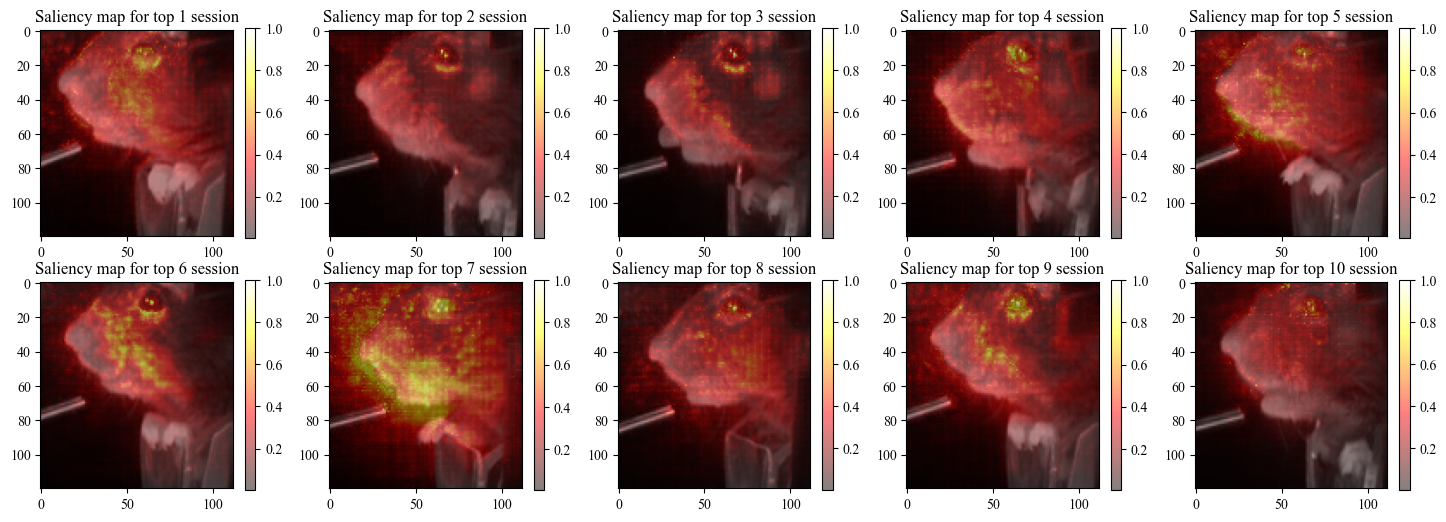

In [19]:
plt.subplots(2,5, figsize=(18,6))

for i in range(10):
    plt.subplot(2,5,i+1)
    plt.title(f'Saliency map for top {i+1} session')
    plt.imshow(best_example_background_images[i], cmap='gray')
    plt.imshow(best_session_saliency_maps[i]/np.max(best_session_saliency_maps[i]), cmap='hot', alpha = 0.5)
    plt.colorbar()

plt.savefig('/mnt/fs6/zwang71/figs/' + 'e2e_saliency_map_top10_sessions.png', dpi=300, bbox_inches='tight')

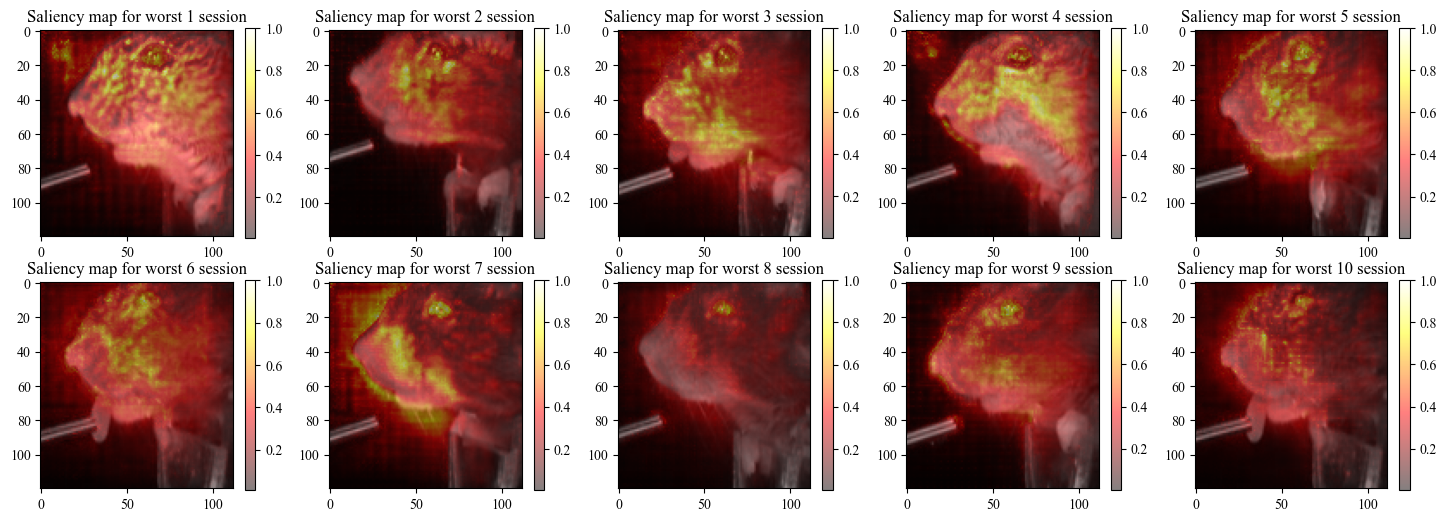

In [20]:
plt.subplots(2,5, figsize=(18,6))

for i in range(10):
    plt.subplot(2,5,i+1)
    plt.title(f'Saliency map for worst {i+1} session')
    plt.imshow(worst_example_background_images[i], cmap='gray')
    plt.imshow(worst_session_saliency_maps[i]/np.max(worst_session_saliency_maps[i]), cmap='hot', alpha = 0.5)
    plt.colorbar()

plt.savefig('/mnt/fs6/zwang71/figs/' + 'e2e_saliency_map_worst10_sessions.png', dpi=300, bbox_inches='tight')

In [21]:
save_session_dict = {
    'best_session_saliency_maps': best_session_saliency_maps,
    'worst_session_saliency_maps': worst_session_saliency_maps,
    'best_example_background_images': best_example_background_images,
    'worst_example_background_images': worst_example_background_images
}
pickle.dump(save_session_dict, open('/mnt/fs6/zwang71/figs/' + 'e2e_saliency_map_top10_worst10_sessions.pickle', 'wb'))